In [ ]:
!pip install avalanche-lib

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.2/134.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 971.9/971.9 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.2/585.2 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.1/309.1 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.4 MB/s eta 0:00:00
   

In [ ]:
pip install pytorchcv==0.0.67

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.4/532.4 kB 21.7 MB/s eta 0:00:00
  Attempting uninstall: pytorchcv
    Found existing installation: pytorchcv 0.0.71
    Uninstalling pytorchcv-0.0.71:
      Successfully uninstalled pytorchcv-0.0.71


In [ ]:
#from avalanche.benchmarks.datasets import MNIST
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.nn import Module, Linear
from torch.optim import SGD
import pytorchcv
import matplotlib.pyplot as plt
from avalanche.benchmarks.classic import SplitMNIST, PermutedMNIST, SplitCIFAR10, SplitOmniglot
from avalanche.benchmarks import nc_benchmark
from avalanche.models import SimpleMLP, IcarlNet
from avalanche.training.plugins import EWCPlugin, GEMPlugin
from avalanche.training import Naive, EWC, ICaRL

from avalanche.training.plugins import EvaluationPlugin
from avalanche.logging import InteractiveLogger
from avalanche.evaluation.metrics import accuracy_metrics, Accuracy, forgetting_metrics
from avalanche.evaluation import PluginMetric
from avalanche.evaluation.metrics import Accuracy
from avalanche.evaluation.metric_results import MetricValue
from avalanche.evaluation.metric_utils import get_metric_name


#AMAZON
import re
import string
import collections

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
benchmark = SplitMNIST(n_experiences=5, seed=1, return_task_id=False)

model = SimpleMLP(num_classes=benchmark.n_classes)

optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()

interactive_logger = InteractiveLogger()

evaluation_plugin = EvaluationPlugin(
    accuracy_metrics(minibatch=True, epoch=True, experience=True, stream=True),
    forgetting_metrics(experience=True, stream=True),
    loggers=[interactive_logger]
)

#Plugin del algoritmo GEM
gem_plugin = GEMPlugin(patterns_per_experience=200, memory_strength=0.5)

cl_strategy = Naive(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    train_mb_size=128,
    train_epochs=4,
    eval_mb_size=128,
    plugins=[gem_plugin],
    evaluator=evaluation_plugin
)

for experience in benchmark.train_stream:
    print(f"Entrenando en la experiencia {experience.current_experience}")
    cl_strategy.train(experience)
    print("Evaluando en el conjunto de prueba:")
    cl_strategy.eval(benchmark.test_stream)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 8571012.69it/s] 


Extracting /root/.avalanche/data/mnist/MNIST/raw/train-images-idx3-ubyte.gz to /root/.avalanche/data/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1850247.35it/s]

Extracting /root/.avalanche/data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.avalanche/data/mnist/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 12825970.21it/s]


Extracting /root/.avalanche/data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.avalanche/data/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3832333.29it/s]

Extracting /root/.avalanche/data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.avalanche/data/mnist/MNIST/raw



Entrenando en la experiencia 0
-- >> Start of training phase << --
100%|██████████| 89/89 [00:03<00:00, 26.03it/s]
Epoch 0 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9478
	Top1_Acc_MB/train_phase/train_stream/Task000 = 1.0000
100%|██████████| 89/89 [00:03<00:00, 29.28it/s]
Epoch 1 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9814
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.9867
100%|██████████| 89/89 [00:03<00:00, 28.48it/s]
Epoch 2 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9862
	Top1_Acc_MB/train_phase/train_stream/Task000 = 1.0000
100%|██████████| 89/89 [00:03<00:00, 23.53it/s]
Epoch 3 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9890
	Top1_Acc_MB/train_phase/train_stream/Task000 = 1.0000
-- >> End of training phase << --
Evaluando en el conjunto de prueba:
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 15/15 [00:00<00:00, 37.88it/s]
> Eval on experie

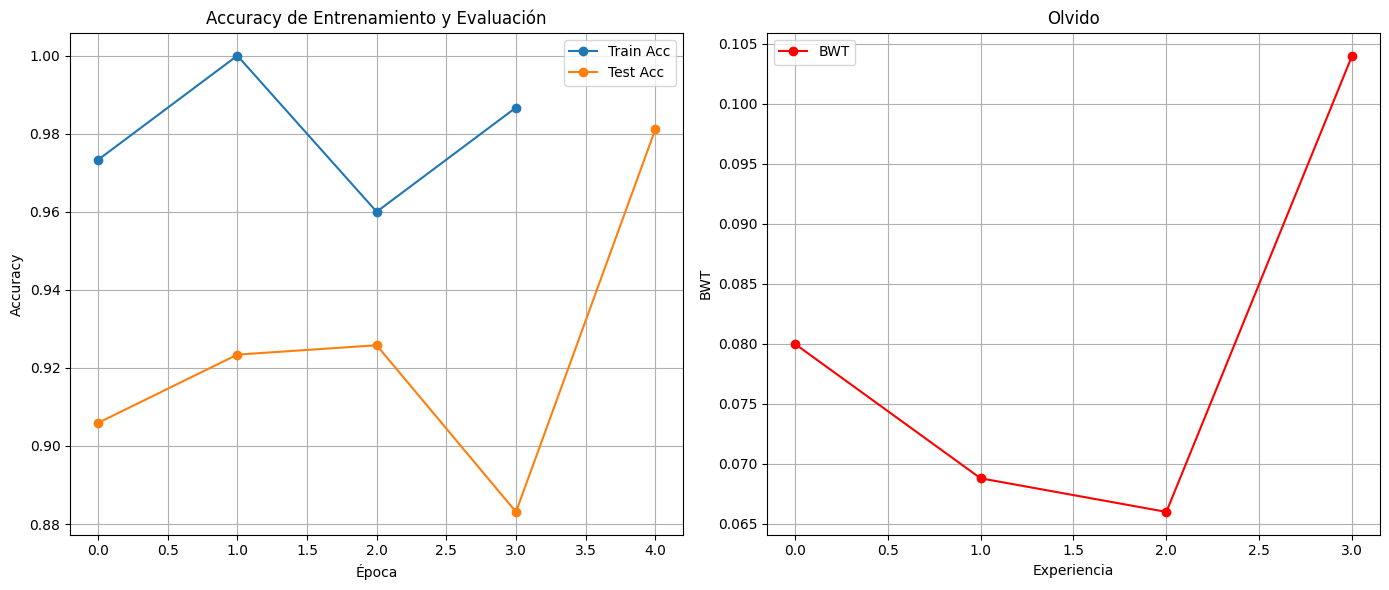

In [ ]:
epochs = [0, 1, 2, 3]
experiences = [0, 1, 2, 3, 4]

train_accuracies = [
    0.9733,
    1,
    0.9600,
    0.9867
]

eval_accuracies = [
    0.9059,
    0.9234,
    0.9258,
    0.8831,
    0.9811
]

#Olvido
forgetting = [
    0.0800,
    0.0688,
    0.0660,
    0.1040,
]

#Accuracy de entrenamiento y evaluación
plt.figure(figsize=(14, 6))

#Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracies, label='Train Acc', marker='o')
plt.plot(experiences, eval_accuracies, label='Test Acc', marker='o')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.title('Accuracy de Entrenamiento y Evaluación')
plt.legend()
plt.grid()

#Olvido
plt.subplot(1, 2, 2)
plt.plot(experiences[:-1], forgetting, label='BWT', marker='o', color='red')
plt.xlabel('Experiencia')
plt.ylabel('BWT')
plt.title('Olvido')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
benchmark = SplitCIFAR10(n_experiences=5, seed=1, return_task_id=False)

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten()
        )
        self.fc = nn.Linear(64 * 8 * 8, num_classes)

    def forward(self, x):
        x = self.cnn(x)
        return self.fc(x)

model = SimpleCNN(num_classes=benchmark.n_classes)

optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()

interactive_logger = InteractiveLogger()

evaluation_plugin = EvaluationPlugin(
    accuracy_metrics(minibatch=True, epoch=True, experience=True, stream=True),
    forgetting_metrics(experience=True, stream=True),
    loggers=[interactive_logger]
)

#Plugin del algoritmo GEM
gem_plugin = GEMPlugin(patterns_per_experience=200, memory_strength=0.5)

cl_strategy = Naive(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    train_mb_size=128,
    train_epochs=4,
    eval_mb_size=128,
    plugins=[gem_plugin],
    evaluator=evaluation_plugin
)

for experience in benchmark.train_stream:
    print(f"Entrenando en la experiencia {experience.current_experience}")
    cl_strategy.train(experience)
    print("Evaluando en el conjunto de prueba:")
    cl_strategy.eval(benchmark.test_stream)

Files already downloaded and verified
Files already downloaded and verified
Entrenando en la experiencia 0
-- >> Start of training phase << --
100%|██████████| 79/79 [00:21<00:00,  3.59it/s]
Epoch 0 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.7217
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.8125
100%|██████████| 79/79 [00:20<00:00,  3.87it/s]
Epoch 1 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8361
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.6875
100%|██████████| 79/79 [00:21<00:00,  3.60it/s]
Epoch 2 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8551
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.8750
100%|██████████| 79/79 [00:20<00:00,  3.82it/s]
Epoch 3 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8770
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.9375
-- >> End of training phase << --
Evaluando en el conjunto de prueba:
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test

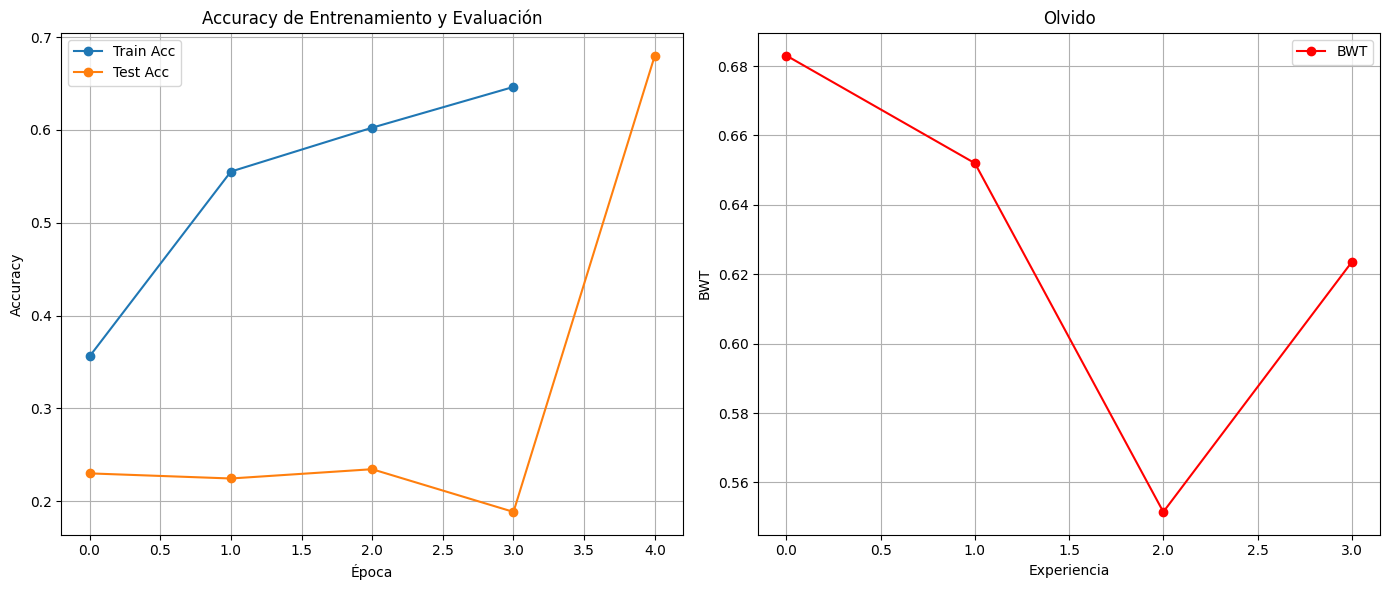

In [ ]:
epochs = [0, 1, 2, 3]
experiences = [0, 1, 2, 3, 4]

train_accuracies = [
    0.3560,
    0.5551,
    0.6024,
    0.6463
]

eval_accuracies = [
    0.2300,
    0.2245,
    0.2345,
    0.1885,
    0.6800
]

#Olvido
forgetting = [
    0.6830,
    0.6520,
    0.5515,
    0.6235,
]

#Accuracy de entrenamiento y evaluación
plt.figure(figsize=(14, 6))

#Acuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracies, label='Train Acc', marker='o')
plt.plot(experiences, eval_accuracies, label='Test Acc', marker='o')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.title('Accuracy de Entrenamiento y Evaluación')
plt.legend()
plt.grid()

#Olvido
plt.subplot(1, 2, 2)
plt.plot(experiences[:-1], forgetting, label='BWT', marker='o', color='red')
plt.xlabel('Experiencia')
plt.ylabel('BWT')
plt.title('Olvido')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()